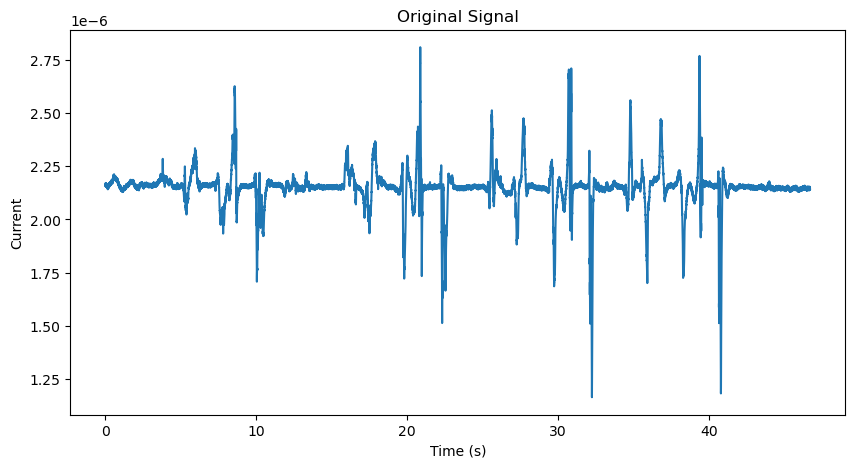

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from scipy.signal import butter, filtfilt, find_peaks
from sklearn.tree import DecisionTreeClassifier

# Load CSV file into DataFrame
data = pd.read_csv('Subject 1 (Left right up down).csv', header=0, names=['Time', 'Current'], na_values=[])

# Drop rows with missing values
data = data.dropna()

# Plot original signal
plt.figure(figsize=(10, 5))
plt.plot(data['Time'], data['Current'])
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Current')
plt.show()





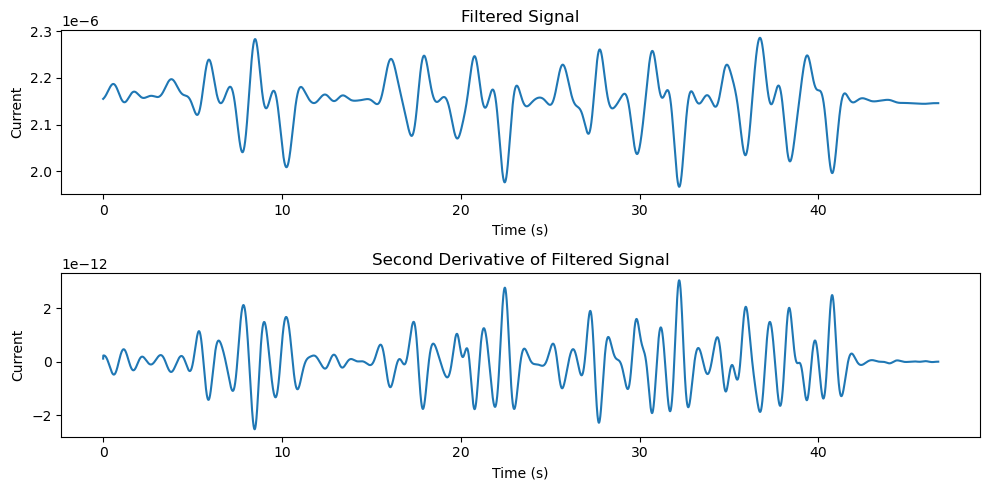

In [83]:
from scipy.signal import butter, filtfilt, savgol_filter, find_peaks
import numpy as np
import matplotlib.pyplot as plt

# Filter signal with a Butterworth filter
def butter_filter(data, cutoff_freq, fs, order=4):
    nyquist_freq = 0.5 * fs
    normalized_cutoff_freq = cutoff_freq / nyquist_freq
    b, a = butter(order, normalized_cutoff_freq, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Set cutoff frequency and sampling frequency
cutoff_freq = 1 # Hz
fs = 1 / np.mean(np.diff(data['Time']))

# Filter signal
filtered_data = butter_filter(data['Current'], cutoff_freq, fs, order=4)

# Take the second derivative of the filtered signal
second_derivative = np.gradient(np.gradient(filtered_data))

# Plot filtered signal and second derivative
plt.figure(figsize=(10, 5))
plt.subplot(211)
plt.plot(data['Time'], filtered_data)
plt.title('Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Current')
plt.subplot(212)
plt.plot(data['Time'], second_derivative)
plt.title('Second Derivative of Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Current')
plt.tight_layout()
plt.show()


Best window size: 0.001
Best threshold level: 1


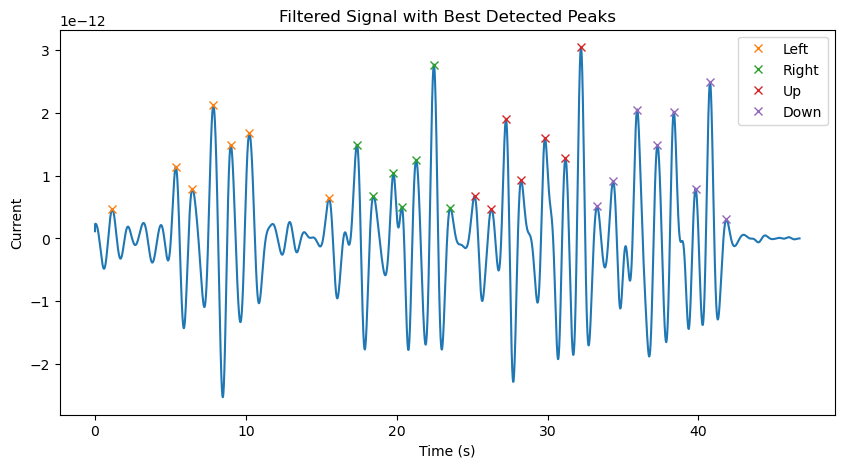

In [84]:
# Define range of window sizes and threshold levels to try
window_sizes = [0.001, 0.005, 0.01, 0.05]
threshold_levels = [1, 2, 3, 4, 5]

# Initialize variables to store best results
best_window = None
best_threshold = None
best_peaks = None
best_score = 0

# Loop over all window sizes and threshold levels and evaluate performance
for window in window_sizes:
    for threshold in threshold_levels:
        # Find peaks in the filtered signal above the threshold, with minimum distance of 1 window length
        min_dist = int(window * fs)
        peaks, properties = find_peaks(second_derivative, height=threshold * baseline, distance=min_dist, width=0.1)

        # Calculate performance score as number of peaks detected
        score = len(peaks)

        # Update best results if this combination is better
        if score > best_score:
            best_window = window
            best_threshold = threshold
            best_peaks = peaks
            best_score = score

# Print best window and threshold values
print('Best window size:', best_window)
print('Best threshold level:', best_threshold)

# Group peaks into left, right, up, and down movements
num_peaks_per_movement = len(best_peaks) // 4
left_peaks = best_peaks[:num_peaks_per_movement]
right_peaks = best_peaks[num_peaks_per_movement:num_peaks_per_movement*2]
up_peaks = best_peaks[num_peaks_per_movement*2:num_peaks_per_movement*3]
down_peaks = best_peaks[num_peaks_per_movement*3:]

# Plot best detected peaks on top of filtered signal
plt.figure(figsize=(10, 5))
plt.plot(data['Time'], second_derivative)
plt.plot(data['Time'][left_peaks], second_derivative[left_peaks], 'x', label='Left')
plt.plot(data['Time'][right_peaks], second_derivative[right_peaks], 'x', label='Right')
plt.plot(data['Time'][up_peaks], second_derivative[up_peaks], 'x', label='Up')
plt.plot(data['Time'][down_peaks], second_derivative[down_peaks], 'x', label='Down')
plt.title('Filtered Signal with Best Detected Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Current')
plt.legend()
plt.show()


Best window size: 0.001
Best threshold level: 1
7


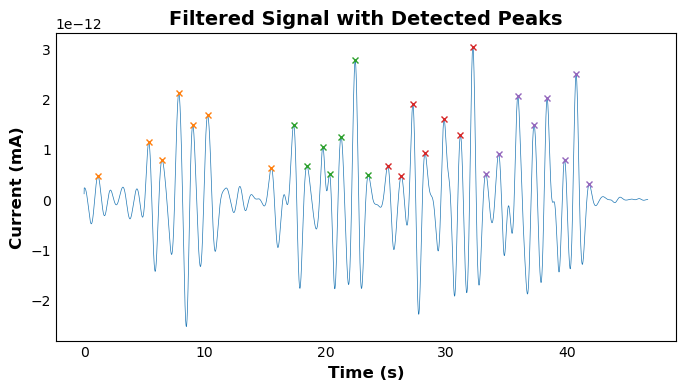

In [108]:
# Define range of window sizes and threshold levels to try
window_sizes = [0.001, 0.005, 0.01, 0.05]
threshold_levels = [1, 2, 3, 4, 5]

# Initialize variables to store best results
best_window = None
best_threshold = None
best_peaks = None
best_score = 0

# Loop over all window sizes and threshold levels and evaluate performance
for window in window_sizes:
    for threshold in threshold_levels:
        # Find peaks in the filtered signal above the threshold, with minimum distance of 1 window length
        min_dist = int(window * fs)
        peaks, properties = find_peaks(second_derivative, height=threshold * baseline, distance=min_dist)

        # Calculate performance score as number of peaks detected
        score = len(peaks)

        # Update best results if this combination is better
        if score > best_score:
            best_window = window
            best_threshold = threshold
            best_peaks = peaks
            best_score = score

# Print best window and threshold values
print('Best window size:', best_window)
print('Best threshold level:', best_threshold)

# Group peaks into left, right, up, and down movements
num_peaks_per_movement = len(best_peaks) // 4
left_peaks = best_peaks[:num_peaks_per_movement]
right_peaks = best_peaks[num_peaks_per_movement:num_peaks_per_movement*2]
up_peaks = best_peaks[num_peaks_per_movement*2:num_peaks_per_movement*3]
down_peaks = best_peaks[num_peaks_per_movement*3:]
# print(num_peaks_per_movement)
# Plot best detected peaks on top of filtered signal
plt.figure(figsize=(8, 4))
plt.plot(data['Time'], second_derivative, linewidth=0.5)
plt.plot(data['Time'][left_peaks], second_derivative[left_peaks], 'x', markersize=5, label='Left')
plt.plot(data['Time'][right_peaks], second_derivative[right_peaks], 'x', markersize=5, label='Right')
plt.plot(data['Time'][up_peaks], second_derivative[up_peaks], 'x', markersize=5, label='Up')
plt.plot(data['Time'][down_peaks], second_derivative[down_peaks], 'x', markersize=5, label='Down')
plt.title('Filtered Signal with Detected Peaks', fontsize=14, fontweight='bold')
plt.xlabel('Time (s)', fontsize=12, fontweight='bold')
plt.ylabel('Current (mA)', fontsize=12, fontweight='bold')
plt.tick_params(axis='both', which='both', length=0)
plt.show()


Best window size: 0.001
Best threshold level: 1


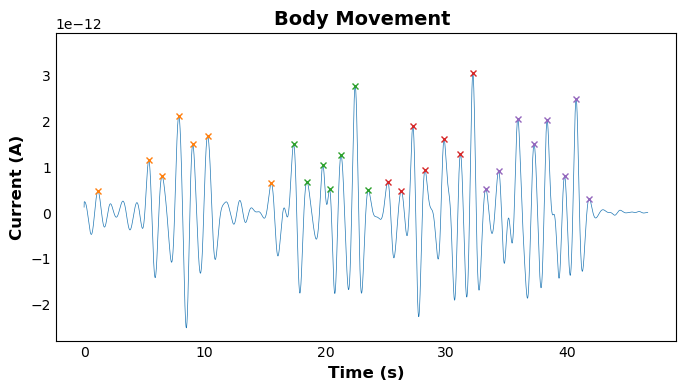

In [97]:
# Define range of window sizes and threshold levels to try
window_sizes = [0.001, 0.005, 0.01, 0.05]
threshold_levels = [1, 2, 3, 4, 5]

# Initialize variables to store best results
best_window = None
best_threshold = None
best_peaks = None
best_score = 0

# Loop over all window sizes and threshold levels and evaluate performance
for window in window_sizes:
    for threshold in threshold_levels:
        # Find peaks in the filtered signal above the threshold, with minimum distance of 1 window length
        min_dist = int(window * fs)
        peaks, properties = find_peaks(second_derivative, height=threshold * baseline, distance=min_dist)

        # Calculate performance score as number of peaks detected
        score = len(peaks)

        # Update best results if this combination is better
        if score > best_score:
            best_window = window
            best_threshold = threshold
            best_peaks = peaks
            best_score = score

# Print best window and threshold values
print('Best window size:', best_window)
print('Best threshold level:', best_threshold)

# Group peaks into left, right, up, and down movements
num_peaks_per_movement = len(best_peaks) // 4
left_peaks = best_peaks[:num_peaks_per_movement]
right_peaks = best_peaks[num_peaks_per_movement:num_peaks_per_movement*2]
up_peaks = best_peaks[num_peaks_per_movement*2:num_peaks_per_movement*3]
down_peaks = best_peaks[num_peaks_per_movement*3:]

# Plot best detected peaks on top of filtered signal
plt.figure(figsize=(8, 4), facecolor='none')
plt.plot(data['Time'], second_derivative, linewidth=0.5)
plt.plot(data['Time'][left_peaks], second_derivative[left_peaks], 'x', markersize=5, label='Left')
plt.plot(data['Time'][right_peaks], second_derivative[right_peaks], 'x', markersize=5, label='Right')
plt.plot(data['Time'][up_peaks], second_derivative[up_peaks], 'x', markersize=5, label='Up')
plt.plot(data['Time'][down_peaks], second_derivative[down_peaks], 'x', markersize=5, label='Down')
plt.title('Body Movement ', fontsize=14, fontweight='bold')
plt.xlabel('Time (s)', fontsize=12, fontweight='bold')
plt.ylabel('Current (A)', fontsize=12, fontweight='bold')
plt.tick_params(axis='both', which='both', length=0)

# Set y-limits to include more space at the top
ylim = plt.ylim()
plt.ylim(ylim[0], ylim[1] + 0.1*(ylim[1]-ylim[0]))

plt.show()


Best window size: 0.001
Best threshold level: 1


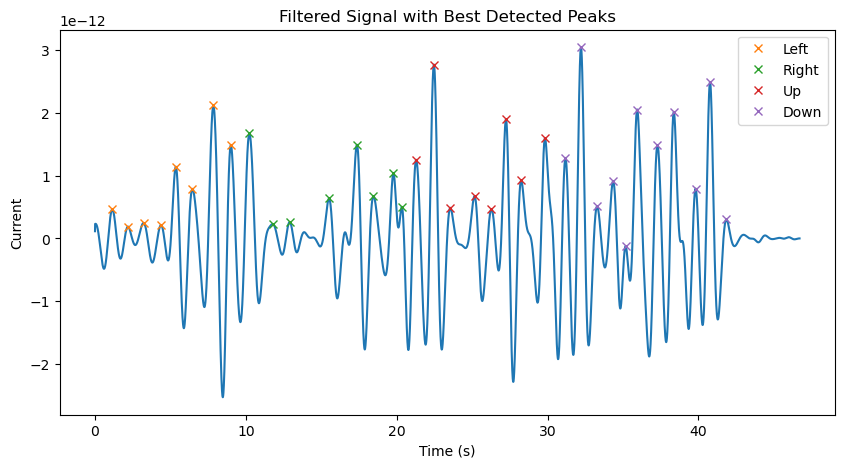

In [115]:
# Define range of window sizes and threshold levels to try
window_sizes = [0.001, 0.005, 0.01, 0.05]
threshold_levels = [1, 2, 3, 4, 5]

# Initialize variables to store best results
best_window = None
best_threshold = None
best_peaks = None
best_score = 0

# Loop over all window sizes and threshold levels and evaluate performance
for window in window_sizes:
    for threshold in threshold_levels:
        # Find peaks in the filtered signal above the threshold, with minimum distance of 1 window length
        min_dist = int(window * fs)
        peaks, properties = find_peaks(second_derivative, prominence=threshold * baseline, distance=min_dist, width=0.1)

        # Calculate performance score as number of peaks detected
        score = len(peaks)

        # Update best results if this combination is better
        if score > best_score:
            best_window = window
            best_threshold = threshold
            best_peaks = peaks
            best_score = score

# Print best window and threshold values
print('Best window size:', best_window)
print('Best threshold level:', best_threshold)

# Group peaks into left, right, up, and down movements
num_peaks_per_movement = len(best_peaks) // 4
left_peaks = best_peaks[:num_peaks_per_movement]
right_peaks = best_peaks[num_peaks_per_movement:num_peaks_per_movement*2]
up_peaks = best_peaks[num_peaks_per_movement*2:num_peaks_per_movement*3]
down_peaks = best_peaks[num_peaks_per_movement*3:]

# Plot best detected peaks on top of filtered signal
plt.figure(figsize=(10, 5))
plt.plot(data['Time'], second_derivative)
plt.plot(data['Time'][left_peaks], second_derivative[left_peaks], 'x', label='Left')
plt.plot(data['Time'][right_peaks], second_derivative[right_peaks], 'x', label='Right')
plt.plot(data['Time'][up_peaks], second_derivative[up_peaks], 'x', label='Up')
plt.plot(data['Time'][down_peaks], second_derivative[down_peaks], 'x', label='Down')
plt.title('Filtered Signal with Best Detected Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Current')
plt.legend()
plt.show()


In [112]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

# Create labels for each movement based on the number of peaks
left_labels = np.zeros(len(left_peaks))
right_labels = np.ones(len(right_peaks))
up_labels = np.full(len(up_peaks), 2)
down_labels = np.full(len(down_peaks), 3)

# Concatenate labels and peaks into arrays
labels = np.concatenate((left_labels, right_labels, up_labels, down_labels))
peaks = np.concatenate((left_peaks, right_peaks, up_peaks, down_peaks))

# Sort labels and peaks by peak location
sort_indices = np.argsort(peaks)
labels_sorted = labels[sort_indices]
peaks_sorted = peaks[sort_indices]

# Create feature matrix with time between peaks as features
time_between_peaks = np.diff(data['Time'][peaks_sorted])
X = time_between_peaks.reshape(-1, 1)
y = labels_sorted[:-1]  # exclude the last label

# Scale features to between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define decision tree classifier with maximum depth of 2
clf = DecisionTreeClassifier(max_depth=2)

# Define k-fold cross-validation object with 5 folds
kf = KFold(n_splits=5)

# Initialize list to store accuracy scores for each fold
scores = []

# Loop over each fold and train and evaluate classifier
for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    clf.fit(X_train_fold, y_train_fold)
    y_pred = clf.predict(X_test_fold)
    score = accuracy_score(y_test_fold, y_pred)
    scores.append(score)

# Print average accuracy score across all folds
print("Average accuracy score: ", np.mean(scores))

# Train decision tree classifier on training set
clf.fit(X_train, y_train)

# Predict labels for test set
y_pred = clf.predict(X_test)

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

# Print results
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)



Average accuracy score:  0.32
Precision:  0.08333333333333333
Recall:  0.25
F1-score:  0.125


In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Create labels for each movement based on the number of peaks
left_labels = np.zeros(len(left_peaks))
right_labels = np.ones(len(right_peaks))
up_labels = np.full(len(up_peaks), 2)
down_labels = np.full(len(down_peaks), 3)

# Concatenate labels and peaks into arrays
labels = np.concatenate((left_labels, right_labels, up_labels, down_labels))
peaks = np.concatenate((left_peaks, right_peaks, up_peaks, down_peaks))

# Sort labels and peaks by peak location
sort_indices = np.argsort(peaks)
labels_sorted = labels[sort_indices]
peaks_sorted = peaks[sort_indices]

# Create feature matrix with time between peaks as features
time_between_peaks = np.diff(data['Time'][peaks_sorted])
X = time_between_peaks.reshape(-1, 1)
y = labels_sorted[:-1]  # exclude the last label

# Scale features to between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define decision tree classifier with maximum depth of 5
clf = DecisionTreeClassifier(max_depth=5)

# Define hyperparameters for grid search
param_grid = {'max_depth': [2, 5, 10], 'min_samples_split': [2, 5, 10]}

# Define grid search object with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit grid search object to training data
grid_search.fit(X_train, y_train)

# Print best hyperparameters found by grid search
print("Best hyperparameters: ", grid_search.best_params_)

# Train decision tree classifier with best hyperparameters on training set
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Predict labels for test set
y_pred = best_clf.predict(X_test)

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

# Print results
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)


Best hyperparameters:  {'max_depth': 2, 'min_samples_split': 2}
Precision:  0.08333333333333333
Recall:  0.25
F1-score:  0.125


/Users/shreeshkarjagi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
